In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from dataProcessing import getData, DataProcessing

In [5]:
DATA_DIR = 'data'
df = pd.read_excel(os.path.join(DATA_DIR, 'ansz.xlsx'))

In [7]:
df.index

DatetimeIndex(['2008-03-02', '2008-03-03', '2008-03-04', '2008-03-05',
               '2008-03-06', '2008-03-07', '2008-03-08', '2008-03-09',
               '2008-03-10', '2008-03-11',
               ...
               '2018-10-10', '2018-10-11', '2018-10-12', '2018-10-13',
               '2018-10-14', '2018-10-15', '2018-10-16', '2018-10-17',
               '2018-10-18', '2018-10-19'],
              dtype='datetime64[ns]', length=3868, freq=None)

In [2]:
train_data_many_day_x, train_data_many_day_y, dev_data_many_day_x, dev_data_many_day_y, \
            test_data_many_day_x, test_data_many_day_y = getData()

In [3]:
pr = DataProcessing(train_data_many_day_x, train_data_many_day_y)
train_data_many_day_x = pr.preprocessInput(train_data_many_day_x)
dev_data_many_day_x = pr.preprocessInput(dev_data_many_day_x)
test_data_many_day_x = pr.preprocessInput(test_data_many_day_x)
train_data_many_day_y = pr.preprocessOutput(train_data_many_day_y)
dev_data_many_day_y = pr.preprocessOutput(dev_data_many_day_y)
test_data_many_day_y = pr.preprocessOutput(test_data_many_day_y)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras import regularizers
from ElapsedTime import ElapsedTime

dropout = 0.5
minL2 = -8
maxL2 = 2
l2Arr = np.logspace(minL2, maxL2, -(minL2-maxL2)+1)
patience = 10
batch_size = 4096
early_stopping=EarlyStopping(patience=patience, restore_best_weights=True, verbose=1)

modelArr = []
hstArr = []
for l2 in l2Arr:
    model = Sequential()
    model.add(Dense(units=28, activation='relu', input_dim=4*7, kernel_regularizer=regularizers.l2(l2)))
    model.add(Dropout(dropout))
    model.add(Dense(units=28, activation='relu', kernel_regularizer=regularizers.l2(l2)))
    model.add(Dropout(dropout))
    model.add(Dense(units=14, activation='relu', kernel_regularizer=regularizers.l2(l2)))
    model.add(Dropout(dropout))
    model.add(Dense(units=7, activation='relu', kernel_regularizer=regularizers.l2(l2)))
    model.add(Dropout(dropout))
    model.add(Dense(units=1, activation='sigmoid'))

    model.compile(loss='mean_squared_error',
                  optimizer='adam',
                  metrics=['mean_squared_error'])
    with ElapsedTime('training'):
        hst = model.fit(train_data_many_day_x, train_data_many_day_y, validation_data=(dev_data_many_day_x, dev_data_many_day_y),
                  verbose=1, epochs=1000, batch_size=batch_size, callbacks=[early_stopping])
    hst = hst.history
    modelArr.append(model)
    hstArr.append(hst)

Using TensorFlow backend.


Train on 28119 samples, validate on 4097 samples
Epoch 1/1000
28119/28119 [==============================] - 1s 43us/step - loss: 0.0570 - mean_squared_error: 0.0570 - val_loss: 0.0378 - val_mean_squared_error: 0.0378
Epoch 2/1000
28119/28119 [==============================] - 0s 7us/step - loss: 0.0481 - mean_squared_error: 0.0481 - val_loss: 0.0353 - val_mean_squared_error: 0.0353
Epoch 3/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0415 - mean_squared_error: 0.0415 - val_loss: 0.0333 - val_mean_squared_error: 0.0333
Epoch 4/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0380 - mean_squared_error: 0.0380 - val_loss: 0.0326 - val_mean_squared_error: 0.0326
Epoch 5/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.0323 - val_mean_squared_error: 0.0323
Epoch 6/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0346 - mean_squared_error: 0

28119/28119 [==============================] - 0s 5us/step - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 98/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 99/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 100/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 101/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 102/1000
28119/28119 [==============================] - 0s 5us/step - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0060 - val_mean_squared_error: 0.00

28119/28119 [==============================] - 0s 5us/step - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 75/1000
28119/28119 [==============================] - 0s 7us/step - loss: 0.0174 - mean_squared_error: 0.0173 - val_loss: 0.0118 - val_mean_squared_error: 0.0117
Epoch 76/1000
28119/28119 [==============================] - 0s 7us/step - loss: 0.0173 - mean_squared_error: 0.0172 - val_loss: 0.0121 - val_mean_squared_error: 0.0120
Epoch 77/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.0114 - val_mean_squared_error: 0.0113
Epoch 78/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0171 - mean_squared_error: 0.0170 - val_loss: 0.0109 - val_mean_squared_error: 0.0108
Epoch 79/1000
28119/28119 [==============================] - 0s 7us/step - loss: 0.0172 - mean_squared_error: 0.0171 - val_loss: 0.0115 - val_mean_squared_error: 0.0114


28119/28119 [==============================] - 0s 5us/step - loss: 0.0213 - mean_squared_error: 0.0206 - val_loss: 0.0153 - val_mean_squared_error: 0.0146
Epoch 36/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0211 - mean_squared_error: 0.0203 - val_loss: 0.0159 - val_mean_squared_error: 0.0151
Epoch 37/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0209 - mean_squared_error: 0.0202 - val_loss: 0.0144 - val_mean_squared_error: 0.0137
Epoch 38/1000
28119/28119 [==============================] - 0s 5us/step - loss: 0.0207 - mean_squared_error: 0.0200 - val_loss: 0.0149 - val_mean_squared_error: 0.0142
Epoch 39/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0204 - mean_squared_error: 0.0196 - val_loss: 0.0134 - val_mean_squared_error: 0.0127
Epoch 40/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0201 - mean_squared_error: 0.0194 - val_loss: 0.0139 - val_mean_squared_error: 0.0132


28119/28119 [==============================] - 0s 5us/step - loss: 0.0127 - mean_squared_error: 0.0121 - val_loss: 0.0052 - val_mean_squared_error: 0.0046
Epoch 132/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0127 - mean_squared_error: 0.0121 - val_loss: 0.0053 - val_mean_squared_error: 0.0047
Epoch 133/1000
28119/28119 [==============================] - 0s 7us/step - loss: 0.0128 - mean_squared_error: 0.0122 - val_loss: 0.0054 - val_mean_squared_error: 0.0048
Epoch 134/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0128 - mean_squared_error: 0.0122 - val_loss: 0.0051 - val_mean_squared_error: 0.0045
Epoch 135/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0127 - mean_squared_error: 0.0121 - val_loss: 0.0052 - val_mean_squared_error: 0.0046
Epoch 136/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0127 - mean_squared_error: 0.0121 - val_loss: 0.0050 - val_mean_squared_error: 0.

28119/28119 [==============================] - 0s 5us/step - loss: 0.0179 - mean_squared_error: 0.0150 - val_loss: 0.0097 - val_mean_squared_error: 0.0068
Epoch 80/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0176 - mean_squared_error: 0.0147 - val_loss: 0.0097 - val_mean_squared_error: 0.0068
Epoch 81/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0177 - mean_squared_error: 0.0148 - val_loss: 0.0094 - val_mean_squared_error: 0.0065
Epoch 82/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0175 - mean_squared_error: 0.0147 - val_loss: 0.0092 - val_mean_squared_error: 0.0063
Epoch 83/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0174 - mean_squared_error: 0.0146 - val_loss: 0.0094 - val_mean_squared_error: 0.0066
Epoch 84/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0172 - mean_squared_error: 0.0144 - val_loss: 0.0093 - val_mean_squared_error: 0.0065


28119/28119 [==============================] - 0s 6us/step - loss: 0.1166 - mean_squared_error: 0.0372 - val_loss: 0.1112 - val_mean_squared_error: 0.0343
Epoch 3/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.1114 - mean_squared_error: 0.0363 - val_loss: 0.1067 - val_mean_squared_error: 0.0339
Epoch 4/1000
28119/28119 [==============================] - 0s 7us/step - loss: 0.1066 - mean_squared_error: 0.0355 - val_loss: 0.1022 - val_mean_squared_error: 0.0335
Epoch 5/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.1019 - mean_squared_error: 0.0348 - val_loss: 0.0980 - val_mean_squared_error: 0.0330
Epoch 6/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0976 - mean_squared_error: 0.0342 - val_loss: 0.0938 - val_mean_squared_error: 0.0326
Epoch 7/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0936 - mean_squared_error: 0.0338 - val_loss: 0.0899 - val_mean_squared_error: 0.0322
Epoch

28119/28119 [==============================] - 0s 6us/step - loss: 0.0236 - mean_squared_error: 0.0199 - val_loss: 0.0149 - val_mean_squared_error: 0.0112
Epoch 99/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0234 - mean_squared_error: 0.0197 - val_loss: 0.0157 - val_mean_squared_error: 0.0120
Epoch 100/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0235 - mean_squared_error: 0.0198 - val_loss: 0.0152 - val_mean_squared_error: 0.0115
Epoch 101/1000
28119/28119 [==============================] - 0s 7us/step - loss: 0.0237 - mean_squared_error: 0.0199 - val_loss: 0.0145 - val_mean_squared_error: 0.0108
Epoch 102/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0235 - mean_squared_error: 0.0198 - val_loss: 0.0146 - val_mean_squared_error: 0.0109
Epoch 103/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0234 - mean_squared_error: 0.0197 - val_loss: 0.0145 - val_mean_squared_error: 0.0

28119/28119 [==============================] - 0s 6us/step - loss: 0.0418 - mean_squared_error: 0.0316 - val_loss: 0.0395 - val_mean_squared_error: 0.0297
Epoch 67/1000
28119/28119 [==============================] - 0s 7us/step - loss: 0.0411 - mean_squared_error: 0.0316 - val_loss: 0.0388 - val_mean_squared_error: 0.0297
Epoch 68/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0404 - mean_squared_error: 0.0315 - val_loss: 0.0382 - val_mean_squared_error: 0.0297
Epoch 69/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0398 - mean_squared_error: 0.0316 - val_loss: 0.0376 - val_mean_squared_error: 0.0297
Epoch 70/1000
28119/28119 [==============================] - 0s 7us/step - loss: 0.0392 - mean_squared_error: 0.0315 - val_loss: 0.0371 - val_mean_squared_error: 0.0297
Epoch 71/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0386 - mean_squared_error: 0.0315 - val_loss: 0.0366 - val_mean_squared_error: 0.0297


28119/28119 [==============================] - 0s 6us/step - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 163/1000
28119/28119 [==============================] - 0s 7us/step - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 164/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 165/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 166/1000
28119/28119 [==============================] - 0s 7us/step - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 167/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0297 - val_mean_squared_error: 0.

28119/28119 [==============================] - 0s 7us/step - loss: 0.1075 - mean_squared_error: 0.0314 - val_loss: 0.1028 - val_mean_squared_error: 0.0297
Epoch 72/1000
28119/28119 [==============================] - 0s 8us/step - loss: 0.1024 - mean_squared_error: 0.0314 - val_loss: 0.0979 - val_mean_squared_error: 0.0297
Epoch 73/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0977 - mean_squared_error: 0.0314 - val_loss: 0.0934 - val_mean_squared_error: 0.0297
Epoch 74/1000
28119/28119 [==============================] - 0s 7us/step - loss: 0.0933 - mean_squared_error: 0.0314 - val_loss: 0.0892 - val_mean_squared_error: 0.0297
Epoch 75/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0892 - mean_squared_error: 0.0314 - val_loss: 0.0852 - val_mean_squared_error: 0.0297
Epoch 76/1000
28119/28119 [==============================] - 0s 7us/step - loss: 0.0854 - mean_squared_error: 0.0314 - val_loss: 0.0816 - val_mean_squared_error: 0.0297


Epoch 167/1000
28119/28119 [==============================] - 0s 7us/step - loss: 0.0313 - mean_squared_error: 0.0312 - val_loss: 0.0298 - val_mean_squared_error: 0.0297
Epoch 168/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0313 - mean_squared_error: 0.0312 - val_loss: 0.0298 - val_mean_squared_error: 0.0297
Epoch 169/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0313 - mean_squared_error: 0.0312 - val_loss: 0.0298 - val_mean_squared_error: 0.0297
Epoch 170/1000
28119/28119 [==============================] - 0s 7us/step - loss: 0.0313 - mean_squared_error: 0.0312 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 171/1000
28119/28119 [==============================] - 0s 7us/step - loss: 0.0313 - mean_squared_error: 0.0312 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 172/1000
28119/28119 [==============================] - 0s 7us/step - loss: 0.0313 - mean_squared_error: 0.0312 - val_loss: 0.0297 - val_mean_sq

28119/28119 [==============================] - 0s 6us/step - loss: 3.9221 - mean_squared_error: 0.0316 - val_loss: 3.7559 - val_mean_squared_error: 0.0297
Epoch 47/1000
28119/28119 [==============================] - 0s 7us/step - loss: 3.6442 - mean_squared_error: 0.0316 - val_loss: 3.4891 - val_mean_squared_error: 0.0297
Epoch 48/1000
28119/28119 [==============================] - 0s 7us/step - loss: 3.3852 - mean_squared_error: 0.0316 - val_loss: 3.2406 - val_mean_squared_error: 0.0297
Epoch 49/1000
28119/28119 [==============================] - 0s 7us/step - loss: 3.1440 - mean_squared_error: 0.0316 - val_loss: 3.0094 - val_mean_squared_error: 0.0297
Epoch 50/1000
28119/28119 [==============================] - 0s 6us/step - loss: 2.9196 - mean_squared_error: 0.0315 - val_loss: 2.7942 - val_mean_squared_error: 0.0297
Epoch 51/1000
28119/28119 [==============================] - 0s 7us/step - loss: 2.7108 - mean_squared_error: 0.0316 - val_loss: 2.5941 - val_mean_squared_error: 0.0297


28119/28119 [==============================] - 0s 7us/step - loss: 0.0337 - mean_squared_error: 0.0313 - val_loss: 0.0321 - val_mean_squared_error: 0.0297
Epoch 143/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0335 - mean_squared_error: 0.0312 - val_loss: 0.0319 - val_mean_squared_error: 0.0297
Epoch 144/1000
28119/28119 [==============================] - 0s 7us/step - loss: 0.0334 - mean_squared_error: 0.0312 - val_loss: 0.0317 - val_mean_squared_error: 0.0297
Epoch 145/1000
28119/28119 [==============================] - 0s 7us/step - loss: 0.0332 - mean_squared_error: 0.0312 - val_loss: 0.0316 - val_mean_squared_error: 0.0297
Epoch 146/1000
28119/28119 [==============================] - 0s 7us/step - loss: 0.0330 - mean_squared_error: 0.0312 - val_loss: 0.0314 - val_mean_squared_error: 0.0297
Epoch 147/1000
28119/28119 [==============================] - 0s 7us/step - loss: 0.0329 - mean_squared_error: 0.0312 - val_loss: 0.0313 - val_mean_squared_error: 0.

Epoch 5/1000
28119/28119 [==============================] - 0s 5us/step - loss: 639.3883 - mean_squared_error: 0.0747 - val_loss: 616.4360 - val_mean_squared_error: 0.0399
Epoch 6/1000
28119/28119 [==============================] - 0s 6us/step - loss: 600.4826 - mean_squared_error: 0.0644 - val_loss: 578.8336 - val_mean_squared_error: 0.0361
Epoch 7/1000
28119/28119 [==============================] - 0s 6us/step - loss: 563.7913 - mean_squared_error: 0.0564 - val_loss: 543.3473 - val_mean_squared_error: 0.0344
Epoch 8/1000
28119/28119 [==============================] - 0s 6us/step - loss: 529.1745 - mean_squared_error: 0.0499 - val_loss: 509.9684 - val_mean_squared_error: 0.0339
Epoch 9/1000
28119/28119 [==============================] - 0s 5us/step - loss: 496.5873 - mean_squared_error: 0.0441 - val_loss: 478.5045 - val_mean_squared_error: 0.0334
Epoch 10/1000
28119/28119 [==============================] - 0s 5us/step - loss: 465.9366 - mean_squared_error: 0.0408 - val_loss: 448.9227 

28119/28119 [==============================] - 0s 5us/step - loss: 0.8441 - mean_squared_error: 0.0314 - val_loss: 0.8098 - val_mean_squared_error: 0.0297
Epoch 101/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.7890 - mean_squared_error: 0.0314 - val_loss: 0.7569 - val_mean_squared_error: 0.0297
Epoch 102/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.7376 - mean_squared_error: 0.0314 - val_loss: 0.7076 - val_mean_squared_error: 0.0297
Epoch 103/1000
28119/28119 [==============================] - 0s 7us/step - loss: 0.6897 - mean_squared_error: 0.0314 - val_loss: 0.6616 - val_mean_squared_error: 0.0297
Epoch 104/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.6450 - mean_squared_error: 0.0314 - val_loss: 0.6186 - val_mean_squared_error: 0.0297
Epoch 105/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.6033 - mean_squared_error: 0.0314 - val_loss: 0.5786 - val_mean_squared_error: 0.

28119/28119 [==============================] - 0s 6us/step - loss: 0.0315 - mean_squared_error: 0.0312 - val_loss: 0.0300 - val_mean_squared_error: 0.0297
Epoch 197/1000
28119/28119 [==============================] - 0s 7us/step - loss: 0.0315 - mean_squared_error: 0.0312 - val_loss: 0.0300 - val_mean_squared_error: 0.0297
Epoch 198/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0315 - mean_squared_error: 0.0312 - val_loss: 0.0300 - val_mean_squared_error: 0.0297
Epoch 199/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0315 - mean_squared_error: 0.0312 - val_loss: 0.0299 - val_mean_squared_error: 0.0297
Epoch 200/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0314 - mean_squared_error: 0.0312 - val_loss: 0.0299 - val_mean_squared_error: 0.0297
Epoch 201/1000
28119/28119 [==============================] - 0s 6us/step - loss: 0.0314 - mean_squared_error: 0.0312 - val_loss: 0.0299 - val_mean_squared_error: 0.

28119/28119 [==============================] - 0s 8us/step - loss: 642.1693 - mean_squared_error: 0.0319 - val_loss: 615.9172 - val_mean_squared_error: 0.0298
Epoch 40/1000
28119/28119 [==============================] - 0s 7us/step - loss: 597.7478 - mean_squared_error: 0.0318 - val_loss: 573.2405 - val_mean_squared_error: 0.0298
Epoch 41/1000
28119/28119 [==============================] - 0s 7us/step - loss: 556.2812 - mean_squared_error: 0.0317 - val_loss: 533.4026 - val_mean_squared_error: 0.0297
Epoch 42/1000
28119/28119 [==============================] - 0s 7us/step - loss: 517.5734 - mean_squared_error: 0.0318 - val_loss: 496.2267 - val_mean_squared_error: 0.0297
Epoch 43/1000
28119/28119 [==============================] - 0s 8us/step - loss: 481.4684 - mean_squared_error: 0.0318 - val_loss: 461.5675 - val_mean_squared_error: 0.0297
Epoch 44/1000
28119/28119 [==============================] - 0s 7us/step - loss: 447.8004 - mean_squared_error: 0.0318 - val_loss: 429.2377 - val_mea

Epoch 87/1000
28119/28119 [==============================] - 0s 8us/step - loss: 18.7810 - mean_squared_error: 0.0314 - val_loss: 17.9972 - val_mean_squared_error: 0.0297
Epoch 88/1000
28119/28119 [==============================] - 0s 7us/step - loss: 17.4593 - mean_squared_error: 0.0314 - val_loss: 16.7310 - val_mean_squared_error: 0.0297
Epoch 89/1000
28119/28119 [==============================] - 0s 7us/step - loss: 16.2313 - mean_squared_error: 0.0314 - val_loss: 15.5546 - val_mean_squared_error: 0.0297
Epoch 90/1000
28119/28119 [==============================] - 0s 8us/step - loss: 15.0904 - mean_squared_error: 0.0314 - val_loss: 14.4615 - val_mean_squared_error: 0.0297
Epoch 91/1000
28119/28119 [==============================] - 0s 7us/step - loss: 14.0303 - mean_squared_error: 0.0314 - val_loss: 13.4457 - val_mean_squared_error: 0.0297
Epoch 92/1000
28119/28119 [==============================] - 0s 7us/step - loss: 13.0451 - mean_squared_error: 0.0314 - val_loss: 12.5016 - val_m

28119/28119 [==============================] - 0s 8us/step - loss: 0.0385 - mean_squared_error: 0.0312 - val_loss: 0.0366 - val_mean_squared_error: 0.0297
Epoch 184/1000
28119/28119 [==============================] - 0s 7us/step - loss: 0.0379 - mean_squared_error: 0.0312 - val_loss: 0.0360 - val_mean_squared_error: 0.0297
Epoch 185/1000
28119/28119 [==============================] - 0s 7us/step - loss: 0.0372 - mean_squared_error: 0.0312 - val_loss: 0.0354 - val_mean_squared_error: 0.0297
Epoch 186/1000
28119/28119 [==============================] - 0s 8us/step - loss: 0.0367 - mean_squared_error: 0.0312 - val_loss: 0.0349 - val_mean_squared_error: 0.0297
Epoch 187/1000
28119/28119 [==============================] - 0s 7us/step - loss: 0.0362 - mean_squared_error: 0.0312 - val_loss: 0.0344 - val_mean_squared_error: 0.0297
Epoch 188/1000
28119/28119 [==============================] - 0s 8us/step - loss: 0.0357 - mean_squared_error: 0.0312 - val_loss: 0.0339 - val_mean_squared_error: 0.

28119/28119 [==============================] - 0s 8us/step - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 280/1000
28119/28119 [==============================] - 0s 7us/step - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 281/1000
28119/28119 [==============================] - 0s 7us/step - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 282/1000
28119/28119 [==============================] - 0s 7us/step - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 283/1000
28119/28119 [==============================] - 0s 8us/step - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Restoring model weights from the end of the best epoch
Epoch 00283: early stopping
training was running for 64.452101 s


In [5]:
lossIdx = np.argwhere(map(lambda x: x == 'loss', model.metrics_names))[0, 0]

In [6]:
lossArr = []
for model in modelArr:
    metrics = model.evaluate(dev_data_many_day_x, dev_data_many_day_y, batch_size=batch_size)
    lossArr.append(metrics[lossIdx])

4097/4097 [==============================] - 0s 4us/step


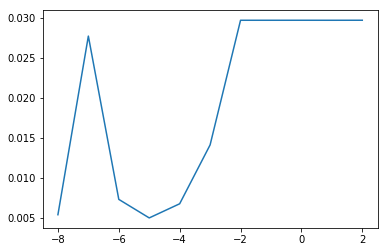

In [7]:
plt.plot(range(minL2, maxL2+1), lossArr)
plt.show()

Minimal loss is 0.00500941664584


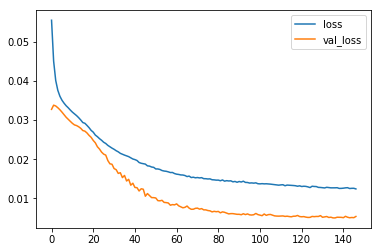

In [8]:
minLoss = np.min(lossArr)
print('Minimal loss is', minLoss)
minLossIdx = np.argmin(lossArr)
hst = hstArr[minLossIdx]
plt.plot(hst['loss'])
plt.plot(hst['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [9]:
model = modelArr[minLossIdx]

In [10]:
pr.postProcessOutput(model.predict(test_data_many_day_x))

array([[ 19.42627525],
       [  7.41615772],
       [  7.53132725],
       ..., 
       [ 25.1746769 ],
       [  6.66000795],
       [  7.29993773]], dtype=float32)

In [11]:
pr.postProcessOutput(test_data_many_day_y)

array([[ 19.8],
       [  2.7],
       [  1.3],
       ..., 
       [ 25.6],
       [  2.8],
       [  0.2]])